# Housing Price Prediction

In this project, I attempted to predict the price of houses using a Linear Regression based on certain features such as Avg. Number of rooms, Area Population etc. It is worty of note that this data is artificially created and not real data.

## Importing our Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
df= pd.read_csv("USA_Housing.csv")

## Data Exploration

Let's explore our data before we create our model to predict prices of houses.

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


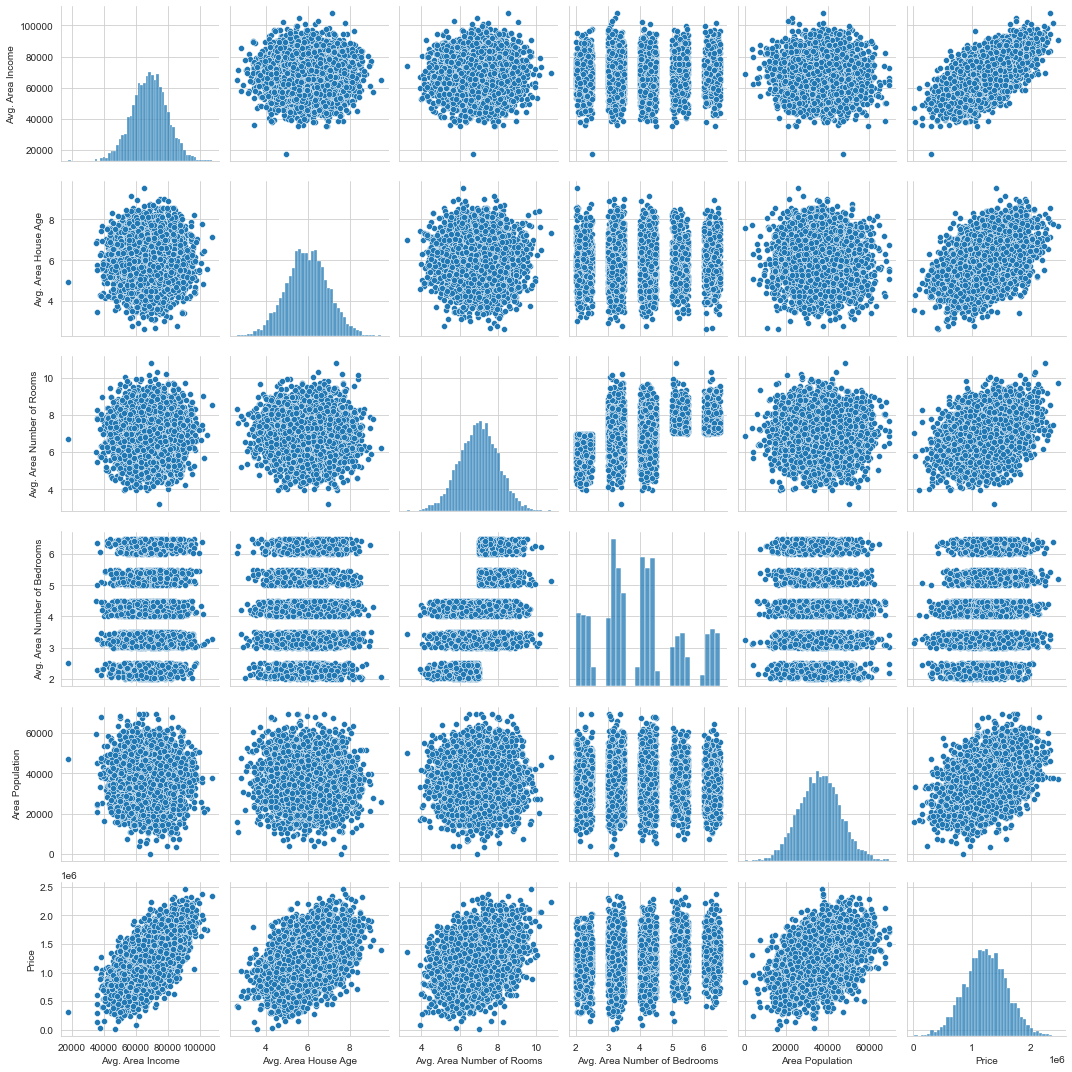

In [7]:
sns.pairplot(df)
plt.tight_layout()

<AxesSubplot:>

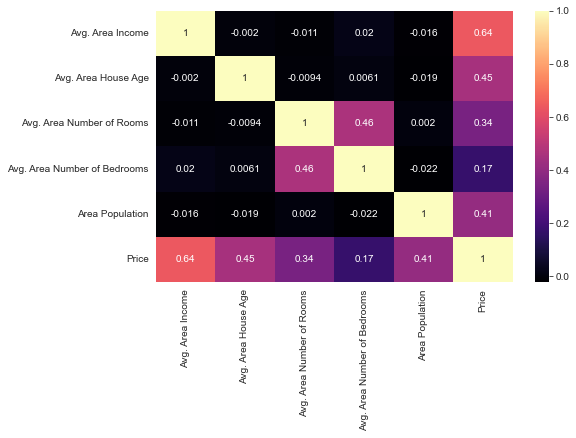

In [8]:
plt.figure(figsize= (8,5))
sns.heatmap(df.corr(), cmap= 'magma', annot=True)

## Setting our X and y variables

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
X= df.iloc[: ,:5] #our features
y= df['Price'] #target column (i.e what we want to predict)

In [11]:
X.head(), y.head()

(   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 0      79545.458574             5.682861                   7.009188   
 1      79248.642455             6.002900                   6.730821   
 2      61287.067179             5.865890                   8.512727   
 3      63345.240046             7.188236                   5.586729   
 4      59982.197226             5.040555                   7.839388   
 
    Avg. Area Number of Bedrooms  Area Population  
 0                          4.09     23086.800503  
 1                          3.09     40173.072174  
 2                          5.13     36882.159400  
 3                          3.26     34310.242831  
 4                          4.23     26354.109472  ,
 0    1.059034e+06
 1    1.505891e+06
 2    1.058988e+06
 3    1.260617e+06
 4    6.309435e+05
 Name: Price, dtype: float64)

## Splitting our data into Test Data and Training Data

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)
#20% of our data would be assigned to test data

## Creating our model and fitting it with our Training data

In [13]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Testing our model on our Test data

In [14]:
ypred= model.predict(X_test)

Text(0.5, 1.0, 'Comparing our predicted prices with test data')

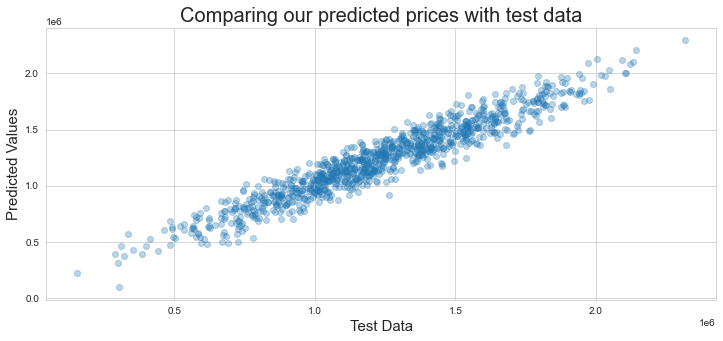

In [15]:
#plotting the predicted data against our test data
plt.figure(figsize= (12,5))
plt.scatter(y_test, ypred, alpha= 0.3)
plt.xlabel("Test Data", fontdict= {'fontsize':15})
plt.ylabel("Predicted Values", fontdict= {'fontsize':15})
plt.title("Comparing our predicted prices with test data", fontdict= {'fontsize': 20})

## Checking the Coefficient and Intercept

In [16]:
coef_df= pd.DataFrame(data= model.coef_, index=X.columns, columns= ['Coef'])
coef_df

,Coef
Avg. Area Income,21.660408
Avg. Area House Age,165809.651149
Avg. Area Number of Rooms,120329.407877
Avg. Area Number of Bedrooms,2193.095579
Area Population,15.285885


In [17]:
#checking the intercept
print("The Y intercept is:", model.intercept_)

The Y intercept is: -2646630.531055349


## Model Evaluation Performance

Checking the r2_score of our model to see the performance of our model

In [18]:
r2_score(y_test, ypred)

0.9146454505138175

An R squared value of 0.91 proves the model is a good model.

## Residuals

<AxesSubplot:xlabel='Price', ylabel='Count'>

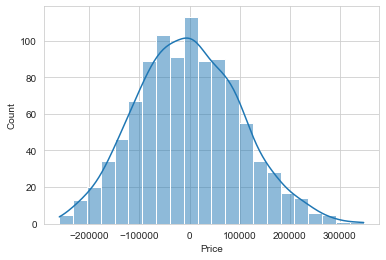

In [19]:
sns.histplot((y_test - ypred), kde=True)

We have a normal distribution here. If it was otherwise, that would mean our model is not a good model

We have successfully built a Linear Regression model. Now we can predict the price of houses based on certain features. 